# Digit Recogniser
#### Introduction

This is Beginner friendly notebook, aims to conduct Exploratory Data Analysis on the DIGIT RECOGNIZER Dataset. It progresses to training CNN models.

We will systematically explore our dataset, employing methods such as data cleaning, descriptive statistics, visualizations, and apply CNN Model. Subsequently, we will derive results and engage in comprehensive discussions to extract profound insights from our analysis.

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shubhamkore18","key":"acbc13343755053d4727ed4b83e8540a"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download -c digit-recognizer

 33% 5.00M/15.3M [00:00<00:00, 28.3MB/s]
100% 15.3M/15.3M [00:00<00:00, 73.1MB/s]


In [6]:
! unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [7]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [8]:
# Import datasets
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [9]:
train.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
38158,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32245,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26328,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29776,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38497,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preprocessing and EDA

In [10]:
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Splitting the data
y_train = train['label'].astype('float32')
X_train = train.drop(['label'], axis = 1).astype('float32')
X_test = test.astype('float32')
X_train.shape, y_train.shape, X_test.shape

((42000, 784), (42000,), (28000, 784))

In [13]:
#reshape and covert pixel values 0 to 1 range
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_train = X_train / 255
X_test = X_test.values.reshape(-1, 28, 28, 1)
X_test = X_test / 255
X_train.shape, X_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [14]:
#one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_train.shape

(42000, 10)

In [15]:
print(train['label'].head())

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


In [16]:
print(y_train[0:5, :])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Model Creation

A little overview about the CNN:

Conv2D layers are used for two-dimensional convolutional operations. They apply a specified number of filters to small patches of the input data to detect spatial patterns like edges and textures. The first two parameters specify the number and size of the filters, and 'relu' is the activation function applied after convolution.

MaxPooling2D layers downsample the spatial dimensions of the input, reducing the number of parameters and computational load. They retain the most significant information by selecting the maximum value in each region.

Dropout layers help prevent overfitting by randomly setting a fraction of input units to zero during training. It introduces a form of regularization, making the model more robust.

Flatten layers reshape the output from the previous layer into a flat vector. They convert the spatial information from convolutional layers into a format suitable for densely connected layers.

Dense layers are fully connected layers where each neuron is connected to every neuron in the previous and next layers. They learn global patterns in the data. The first two dense layers in your model use the 'relu' activation function, while the last layer uses 'softmax' for multi-class classification.

In [17]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),

    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'Same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'Same'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'Same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'Same'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation ='relu'),
    tf.keras.layers.Dense(256, activation ='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation ='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 6, 6, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 354,922 (1.35 MB)

 Trainable params: 354,922 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
Optimizer = tf.keras.optimizers.Adam(
    learning_rate = 0.0005,
    name = 'Adam'
)

In [19]:
model.compile(optimizer = Optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
history=model.fit(X_train, y_train, batch_size = 50, epochs = 10)

Epoch 1/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7064 - loss: 0.8246
Epoch 2/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9749 - loss: 0.0869
Epoch 3/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9823 - loss: 0.0562
Epoch 4/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9861 - loss: 0.0474
Epoch 5/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9885 - loss: 0.0418
Epoch 6/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9905 - loss: 0.0328
Epoch 7/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9910 - loss: 0.0321
Epoch 8/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9912 - loss: 0.0294
Epoch 9/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9931 - loss: 0.0251
Epoch 10/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9948 - loss: 0.0203


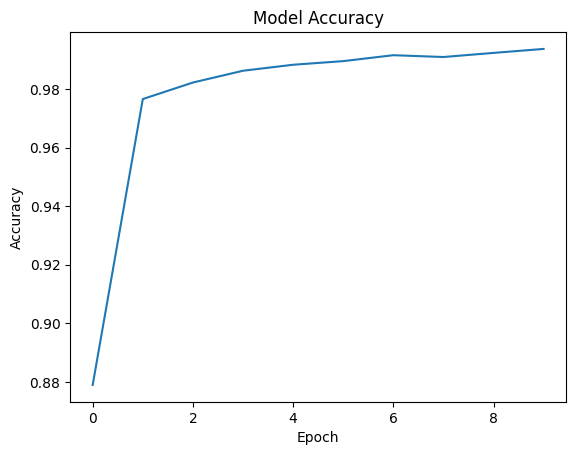

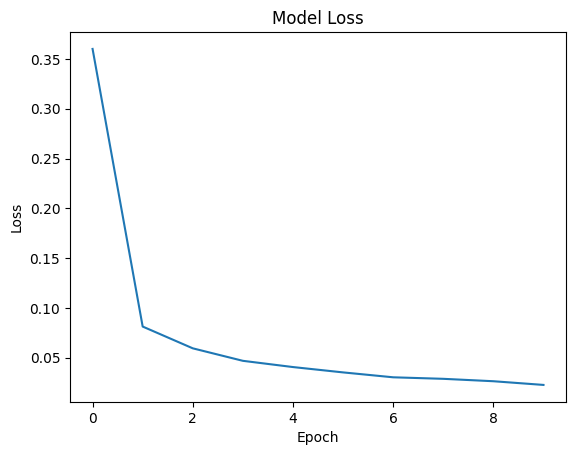

In [20]:
# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


#### Predicting the Values for the Test set given in competition

In [21]:
results = model.predict(X_test)
results = np.argmax(results, axis = 1)
results = pd.Series(results, name = 'Label')

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


### Submission File

In [22]:
submission = pd.concat([pd.Series(range(1, 28001), name = 'ImageId'), results], axis = 1)
submission.to_csv('submission.csv', index = False)